# Nerfies Dataset Processing.

**Author**: [Keunhong Park](https://keunhong.com)

[[Project Page](https://nerfies.github.io)]
[[Paper](https://storage.googleapis.com/nerfies-public/videos/nerfies_paper.pdf)]
[[Video](https://www.youtube.com/watch?v=MrKrnHhk8IA)]
[[GitHub](https://github.com/google/nerfies)]

This notebook contains an example workflow for converting a video file to a Nerfies dataset.

### Instructions

1. Convert a video into our dataset format using this notebook.
2. Train a Nerfie using the [training notebook](https://colab.sandbox.google.com/github/google/nerfies/blob/main/notebooks/Nerfies_Training.ipynb).


### Notes
* While this will work for small datasets in a Colab runtime, larger datasets will require more compute power.
* If you would like to train a model on a serious dataset, you should consider copying this to your own workstation and running it there. Some minor modifications will be required, and you will have to install the dependencies separately.
* Please report issues on the [GitHub issue tracker](https://github.com/google/nerfies/issues).

If you find this work useful, please consider citing:
```bibtex
@article{park2020nerfies
  author    = {Park, Keunhong 
               and Sinha, Utkarsh 
               and Barron, Jonathan T. 
               and Bouaziz, Sofien 
               and Goldman, Dan B 
               and Seitz, Steven M. 
               and Martin-Brualla, Ricardo},
  title     = {Deformable Neural Radiance Fields},
  journal   = {arXiv preprint arXiv:2011.12948},
  year      = {2020},
}
```

In [1]:
# @title Configure dataset directories
from pathlib import Path

# @markdown The base directory for all captures. This can be anything if you're running this notebook on your own Jupyter runtime.
save_dir = '../dataset/'  # @param {type: 'string'}
# @markdown The name of this capture. The working directory will be `$save_dir/$capture_name`. **Make sure you change this** when processing a new video.
#seqname= 'cat_905'
seqname= 'T_samba1'
#seqname= ['T_samba1', 'T_samba2', 'T_samba3', 'T_samba4', 'T_samba5', 'T_samba6', 'T_samba7', 'T_samba8']
capture_name = seqname  # @param {type: 'string'}
#capture_name = 'T_samba'  # @param {type: 'string'}
# The root directory for this capture.
root_dir = Path(save_dir, capture_name)
# Where to save RGB images.
rgb_dir = root_dir / 'rgb'
rgb_raw_dir = root_dir / 'rgb-raw'
# Where to save the COLMAP outputs.
colmap_dir = root_dir / 'colmap'
colmap_db_path = colmap_dir / 'database.db'
colmap_out_path = colmap_dir / 'sparse'

colmap_out_path.mkdir(exist_ok=True, parents=True)
rgb_raw_dir.mkdir(exist_ok=True, parents=True)

camera_dir = root_dir / 'camera'
camera_dir.mkdir(exist_ok=True, parents=True)

print(f"""Directories configured:
  root_dir = {root_dir}
  rgb_raw_dir = {rgb_raw_dir}
  rgb_dir = {rgb_dir}
  colmap_dir = {colmap_dir}
  camera_dir = {camera_dir}
""")

Directories configured:
  root_dir = ../dataset/T_samba
  rgb_raw_dir = ../dataset/T_samba/rgb-raw
  rgb_dir = ../dataset/T_samba/rgb
  colmap_dir = ../dataset/T_samba/colmap
  camera_dir = ../dataset/T_samba/camera



## Dataset Processing.

### Load Video.

In this step we upload a video file and flatten it into PNG files using ffmpeg.

In [7]:
# @title Flatten into images.

import cv2
import glob

# @markdown Check this if you want to reprocess the frames.
overwrite = True  # @param {type:'boolean'}

if (rgb_dir / '1x').exists() and not overwrite:
  raise RuntimeError(
      f'The RGB frames have already been processed. Check `overwrite` and run again if you really meant to do this.')
else:
  tmp_rgb_raw_dir = 'rgb-raw'
  !rm -rf "$tmp_rgb_raw_dir"
  !mkdir -p "$tmp_rgb_raw_dir"

  if isinstance(seqname, str):
      imglist = sorted(glob.glob('/private/home/gengshany/data/DAVIS/JPEGImages/Full-Resolution/%s/*'%seqname))
  else:
      imglist = []
      for seq in seqname:
        print(seq)
        imglist += sorted(glob.glob('/private/home/gengshany/data/DAVIS/JPEGImages/Full-Resolution/%s/*'%seq))
  for idx,i in enumerate(imglist):
        #print(i)
        img = cv2.imread(i)
        
        use_lasr=True
        if use_lasr:
            imgmask = cv2.imread(i.replace('JPEGImages', 'Annotations').replace('.jpg', '.png'),0)>0
            img[~imgmask]=0.
            #img[imgmask]=255.
        #cv2.imwrite('%s/%s.png'%(tmp_rgb_raw_dir, i.split('/')[-1][:-4]), img)
        cv2.imwrite('%s/%05d.png'%(tmp_rgb_raw_dir, idx), img)
  
  !mkdir -p "$rgb_raw_dir"
  !rsync -av "$tmp_rgb_raw_dir/" "$rgb_raw_dir/"

T_samba1
T_samba2
T_samba3
T_samba4
T_samba5
T_samba6
T_samba7
T_samba8
sending incremental file list
./
00000.png
00001.png
00002.png
00003.png
00004.png
00005.png
00006.png
00007.png
00008.png
00009.png
00010.png
00011.png
00012.png
00013.png
00014.png
00015.png
00016.png
00017.png
00018.png
00019.png
00020.png
00021.png
00022.png
00023.png
00024.png
00025.png
00026.png
00027.png
00028.png
00029.png
00030.png
00031.png
00032.png
00033.png
00034.png
00035.png
00036.png
00037.png
00038.png
00039.png
00040.png
00041.png
00042.png
00043.png
00044.png
00045.png
00046.png
00047.png
00048.png
00049.png
00050.png
00051.png
00052.png
00053.png
00054.png
00055.png
00056.png
00057.png
00058.png
00059.png
00060.png
00061.png
00062.png
00063.png
00064.png
00065.png
00066.png
00067.png
00068.png
00069.png
00070.png
00071.png
00072.png
00073.png
00074.png
00075.png
00076.png
00077.png
00078.png
00079.png
00080.png
00081.png
00082.png
00083.png
00084.png
00085.png
00086.png
00087.png
00088.png
00089

00813.png
00814.png
00815.png
00816.png
00817.png
00818.png
00819.png
00820.png
00821.png
00822.png
00823.png
00824.png
00825.png
00826.png
00827.png
00828.png
00829.png
00830.png
00831.png
00832.png
00833.png
00834.png
00835.png
00836.png
00837.png
00838.png
00839.png
00840.png
00841.png
00842.png
00843.png
00844.png
00845.png
00846.png
00847.png
00848.png
00849.png
00850.png
00851.png
00852.png
00853.png
00854.png
00855.png
00856.png
00857.png
00858.png
00859.png
00860.png
00861.png
00862.png
00863.png
00864.png
00865.png
00866.png
00867.png
00868.png
00869.png
00870.png
00871.png
00872.png
00873.png
00874.png
00875.png
00876.png
00877.png
00878.png
00879.png
00880.png
00881.png
00882.png
00883.png
00884.png
00885.png
00886.png
00887.png
00888.png
00889.png
00890.png
00891.png
00892.png
00893.png
00894.png
00895.png
00896.png
00897.png
00898.png
00899.png
00900.png
00901.png
00902.png
00903.png
00904.png
00905.png
00906.png
00907.png
00908.png
00909.png
00910.png
00911.png
00912.png


In [10]:
# @title Resize images into different scales.
# @markdown Here we save the input images at various resolutions (downsample by a factor of 1, 2, 4, 8). We use area relation interpolation to prevent moire artifacts.
import concurrent.futures
import numpy as np
import cv2
import imageio
from PIL import Image


def save_image(path, image: np.ndarray) -> None:
  print(f'Saving {path}')
  if not path.parent.exists():
    path.parent.mkdir(exist_ok=True, parents=True)
  with path.open('wb') as f:
    image = Image.fromarray(np.asarray(image))
    image.save(f, format=path.suffix.lstrip('.'))


def image_to_uint8(image: np.ndarray) -> np.ndarray:
  """Convert the image to a uint8 array."""
  if image.dtype == np.uint8:
    return image
  if not issubclass(image.dtype.type, np.floating):
    raise ValueError(
        f'Input image should be a floating type but is of type {image.dtype!r}')
  return (image * 255).clip(0.0, 255).astype(np.uint8)


def make_divisible(image: np.ndarray, divisor: int) -> np.ndarray:
  """Trim the image if not divisible by the divisor."""
  height, width = image.shape[:2]
  if height % divisor == 0 and width % divisor == 0:
    return image

  new_height = height - height % divisor
  new_width = width - width % divisor

  return image[:new_height, :new_width]


def downsample_image(image: np.ndarray, scale: int) -> np.ndarray:
  """Downsamples the image by an integer factor to prevent artifacts."""
  if scale == 1:
    return image

  height, width = image.shape[:2]
  if height % scale > 0 or width % scale > 0:
    raise ValueError(f'Image shape ({height},{width}) must be divisible by the'
                     f' scale ({scale}).')
  out_height, out_width = height // scale, width // scale
  resized = cv2.resize(image, (out_width, out_height), cv2.INTER_AREA)
  return resized



image_scales = "1,2,4,8"  # @param {type: "string"}
image_scales = [int(x) for x in image_scales.split(',')]

!rm -rf "$tmp_rgb_dir"
tmp_rgb_dir = Path('rgb')

for image_path in Path(tmp_rgb_raw_dir).glob('*.png'):
  image = make_divisible(imageio.imread(image_path), max(image_scales))
  for scale in image_scales:
    save_image(
        tmp_rgb_dir / f'{scale}x/{image_path.stem}.png',
        image_to_uint8(downsample_image(image, scale)))

!rsync -av "$tmp_rgb_dir/" "$rgb_dir/"

Saving rgb/1x/00000.png
Saving rgb/2x/00000.png
Saving rgb/4x/00000.png
Saving rgb/8x/00000.png
Saving rgb/1x/00001.png
Saving rgb/2x/00001.png
Saving rgb/4x/00001.png
Saving rgb/8x/00001.png
Saving rgb/1x/00002.png
Saving rgb/2x/00002.png
Saving rgb/4x/00002.png
Saving rgb/8x/00002.png
Saving rgb/1x/00003.png
Saving rgb/2x/00003.png
Saving rgb/4x/00003.png
Saving rgb/8x/00003.png
Saving rgb/1x/00004.png
Saving rgb/2x/00004.png
Saving rgb/4x/00004.png
Saving rgb/8x/00004.png
Saving rgb/1x/00005.png
Saving rgb/2x/00005.png
Saving rgb/4x/00005.png
Saving rgb/8x/00005.png
Saving rgb/1x/00006.png
Saving rgb/2x/00006.png
Saving rgb/4x/00006.png
Saving rgb/8x/00006.png
Saving rgb/1x/00007.png
Saving rgb/2x/00007.png
Saving rgb/4x/00007.png
Saving rgb/8x/00007.png
Saving rgb/1x/00008.png
Saving rgb/2x/00008.png
Saving rgb/4x/00008.png
Saving rgb/8x/00008.png
Saving rgb/1x/00009.png
Saving rgb/2x/00009.png
Saving rgb/4x/00009.png
Saving rgb/8x/00009.png
Saving rgb/1x/00010.png
Saving rgb/2x/00

Saving rgb/2x/00087.png
Saving rgb/4x/00087.png
Saving rgb/8x/00087.png
Saving rgb/1x/00088.png
Saving rgb/2x/00088.png
Saving rgb/4x/00088.png
Saving rgb/8x/00088.png
Saving rgb/1x/00089.png
Saving rgb/2x/00089.png
Saving rgb/4x/00089.png
Saving rgb/8x/00089.png
Saving rgb/1x/00090.png
Saving rgb/2x/00090.png
Saving rgb/4x/00090.png
Saving rgb/8x/00090.png
Saving rgb/1x/00091.png
Saving rgb/2x/00091.png
Saving rgb/4x/00091.png
Saving rgb/8x/00091.png
Saving rgb/1x/00092.png
Saving rgb/2x/00092.png
Saving rgb/4x/00092.png
Saving rgb/8x/00092.png
Saving rgb/1x/00093.png
Saving rgb/2x/00093.png
Saving rgb/4x/00093.png
Saving rgb/8x/00093.png
Saving rgb/1x/00094.png
Saving rgb/2x/00094.png
Saving rgb/4x/00094.png
Saving rgb/8x/00094.png
Saving rgb/1x/00095.png
Saving rgb/2x/00095.png
Saving rgb/4x/00095.png
Saving rgb/8x/00095.png
Saving rgb/1x/00096.png
Saving rgb/2x/00096.png
Saving rgb/4x/00096.png
Saving rgb/8x/00096.png
Saving rgb/1x/00097.png
Saving rgb/2x/00097.png
Saving rgb/4x/00

Saving rgb/2x/00173.png
Saving rgb/4x/00173.png
Saving rgb/8x/00173.png
Saving rgb/1x/00174.png
Saving rgb/2x/00174.png
Saving rgb/4x/00174.png
Saving rgb/8x/00174.png
Saving rgb/1x/00175.png
Saving rgb/2x/00175.png
Saving rgb/4x/00175.png
Saving rgb/8x/00175.png
Saving rgb/1x/00176.png
Saving rgb/2x/00176.png
Saving rgb/4x/00176.png
Saving rgb/8x/00176.png
Saving rgb/1x/00177.png
Saving rgb/2x/00177.png
Saving rgb/4x/00177.png
Saving rgb/8x/00177.png
Saving rgb/1x/00178.png
Saving rgb/2x/00178.png
Saving rgb/4x/00178.png
Saving rgb/8x/00178.png
Saving rgb/1x/00179.png
Saving rgb/2x/00179.png
Saving rgb/4x/00179.png
Saving rgb/8x/00179.png
Saving rgb/1x/00180.png
Saving rgb/2x/00180.png
Saving rgb/4x/00180.png
Saving rgb/8x/00180.png
Saving rgb/1x/00181.png
Saving rgb/2x/00181.png
Saving rgb/4x/00181.png
Saving rgb/8x/00181.png
Saving rgb/1x/00182.png
Saving rgb/2x/00182.png
Saving rgb/4x/00182.png
Saving rgb/8x/00182.png
Saving rgb/1x/00183.png
Saving rgb/2x/00183.png
Saving rgb/4x/00

Saving rgb/2x/00259.png
Saving rgb/4x/00259.png
Saving rgb/8x/00259.png
Saving rgb/1x/00260.png
Saving rgb/2x/00260.png
Saving rgb/4x/00260.png
Saving rgb/8x/00260.png
Saving rgb/1x/00261.png
Saving rgb/2x/00261.png
Saving rgb/4x/00261.png
Saving rgb/8x/00261.png
Saving rgb/1x/00262.png
Saving rgb/2x/00262.png
Saving rgb/4x/00262.png
Saving rgb/8x/00262.png
Saving rgb/1x/00263.png
Saving rgb/2x/00263.png
Saving rgb/4x/00263.png
Saving rgb/8x/00263.png
Saving rgb/1x/00264.png
Saving rgb/2x/00264.png
Saving rgb/4x/00264.png
Saving rgb/8x/00264.png
Saving rgb/1x/00265.png
Saving rgb/2x/00265.png
Saving rgb/4x/00265.png
Saving rgb/8x/00265.png
Saving rgb/1x/00266.png
Saving rgb/2x/00266.png
Saving rgb/4x/00266.png
Saving rgb/8x/00266.png
Saving rgb/1x/00267.png
Saving rgb/2x/00267.png
Saving rgb/4x/00267.png
Saving rgb/8x/00267.png
Saving rgb/1x/00268.png
Saving rgb/2x/00268.png
Saving rgb/4x/00268.png
Saving rgb/8x/00268.png
Saving rgb/1x/00269.png
Saving rgb/2x/00269.png
Saving rgb/4x/00

Saving rgb/2x/00345.png
Saving rgb/4x/00345.png
Saving rgb/8x/00345.png
Saving rgb/1x/00346.png
Saving rgb/2x/00346.png
Saving rgb/4x/00346.png
Saving rgb/8x/00346.png
Saving rgb/1x/00347.png
Saving rgb/2x/00347.png
Saving rgb/4x/00347.png
Saving rgb/8x/00347.png
Saving rgb/1x/00348.png
Saving rgb/2x/00348.png
Saving rgb/4x/00348.png
Saving rgb/8x/00348.png
Saving rgb/1x/00349.png
Saving rgb/2x/00349.png
Saving rgb/4x/00349.png
Saving rgb/8x/00349.png
Saving rgb/1x/00350.png
Saving rgb/2x/00350.png
Saving rgb/4x/00350.png
Saving rgb/8x/00350.png
Saving rgb/1x/00351.png
Saving rgb/2x/00351.png
Saving rgb/4x/00351.png
Saving rgb/8x/00351.png
Saving rgb/1x/00352.png
Saving rgb/2x/00352.png
Saving rgb/4x/00352.png
Saving rgb/8x/00352.png
Saving rgb/1x/00353.png
Saving rgb/2x/00353.png
Saving rgb/4x/00353.png
Saving rgb/8x/00353.png
Saving rgb/1x/00354.png
Saving rgb/2x/00354.png
Saving rgb/4x/00354.png
Saving rgb/8x/00354.png
Saving rgb/1x/00355.png
Saving rgb/2x/00355.png
Saving rgb/4x/00

Saving rgb/2x/00431.png
Saving rgb/4x/00431.png
Saving rgb/8x/00431.png
Saving rgb/1x/00432.png
Saving rgb/2x/00432.png
Saving rgb/4x/00432.png
Saving rgb/8x/00432.png
Saving rgb/1x/00433.png
Saving rgb/2x/00433.png
Saving rgb/4x/00433.png
Saving rgb/8x/00433.png
Saving rgb/1x/00434.png
Saving rgb/2x/00434.png
Saving rgb/4x/00434.png
Saving rgb/8x/00434.png
Saving rgb/1x/00435.png
Saving rgb/2x/00435.png
Saving rgb/4x/00435.png
Saving rgb/8x/00435.png
Saving rgb/1x/00436.png
Saving rgb/2x/00436.png
Saving rgb/4x/00436.png
Saving rgb/8x/00436.png
Saving rgb/1x/00437.png
Saving rgb/2x/00437.png
Saving rgb/4x/00437.png
Saving rgb/8x/00437.png
Saving rgb/1x/00438.png
Saving rgb/2x/00438.png
Saving rgb/4x/00438.png
Saving rgb/8x/00438.png
Saving rgb/1x/00439.png
Saving rgb/2x/00439.png
Saving rgb/4x/00439.png
Saving rgb/8x/00439.png
Saving rgb/1x/00440.png
Saving rgb/2x/00440.png
Saving rgb/4x/00440.png
Saving rgb/8x/00440.png
Saving rgb/1x/00441.png
Saving rgb/2x/00441.png
Saving rgb/4x/00

Saving rgb/2x/00517.png
Saving rgb/4x/00517.png
Saving rgb/8x/00517.png
Saving rgb/1x/00518.png
Saving rgb/2x/00518.png
Saving rgb/4x/00518.png
Saving rgb/8x/00518.png
Saving rgb/1x/00519.png
Saving rgb/2x/00519.png
Saving rgb/4x/00519.png
Saving rgb/8x/00519.png
Saving rgb/1x/00520.png
Saving rgb/2x/00520.png
Saving rgb/4x/00520.png
Saving rgb/8x/00520.png
Saving rgb/1x/00521.png
Saving rgb/2x/00521.png
Saving rgb/4x/00521.png
Saving rgb/8x/00521.png
Saving rgb/1x/00522.png
Saving rgb/2x/00522.png
Saving rgb/4x/00522.png
Saving rgb/8x/00522.png
Saving rgb/1x/00523.png
Saving rgb/2x/00523.png
Saving rgb/4x/00523.png
Saving rgb/8x/00523.png
Saving rgb/1x/00524.png
Saving rgb/2x/00524.png
Saving rgb/4x/00524.png
Saving rgb/8x/00524.png
Saving rgb/1x/00525.png
Saving rgb/2x/00525.png
Saving rgb/4x/00525.png
Saving rgb/8x/00525.png
Saving rgb/1x/00526.png
Saving rgb/2x/00526.png
Saving rgb/4x/00526.png
Saving rgb/8x/00526.png
Saving rgb/1x/00527.png
Saving rgb/2x/00527.png
Saving rgb/4x/00

Saving rgb/2x/00603.png
Saving rgb/4x/00603.png
Saving rgb/8x/00603.png
Saving rgb/1x/00604.png
Saving rgb/2x/00604.png
Saving rgb/4x/00604.png
Saving rgb/8x/00604.png
Saving rgb/1x/00605.png
Saving rgb/2x/00605.png
Saving rgb/4x/00605.png
Saving rgb/8x/00605.png
Saving rgb/1x/00606.png
Saving rgb/2x/00606.png
Saving rgb/4x/00606.png
Saving rgb/8x/00606.png
Saving rgb/1x/00607.png
Saving rgb/2x/00607.png
Saving rgb/4x/00607.png
Saving rgb/8x/00607.png
Saving rgb/1x/00608.png
Saving rgb/2x/00608.png
Saving rgb/4x/00608.png
Saving rgb/8x/00608.png
Saving rgb/1x/00609.png
Saving rgb/2x/00609.png
Saving rgb/4x/00609.png
Saving rgb/8x/00609.png
Saving rgb/1x/00610.png
Saving rgb/2x/00610.png
Saving rgb/4x/00610.png
Saving rgb/8x/00610.png
Saving rgb/1x/00611.png
Saving rgb/2x/00611.png
Saving rgb/4x/00611.png
Saving rgb/8x/00611.png
Saving rgb/1x/00612.png
Saving rgb/2x/00612.png
Saving rgb/4x/00612.png
Saving rgb/8x/00612.png
Saving rgb/1x/00613.png
Saving rgb/2x/00613.png
Saving rgb/4x/00

Saving rgb/2x/00690.png
Saving rgb/4x/00690.png
Saving rgb/8x/00690.png
Saving rgb/1x/00691.png
Saving rgb/2x/00691.png
Saving rgb/4x/00691.png
Saving rgb/8x/00691.png
Saving rgb/1x/00692.png
Saving rgb/2x/00692.png
Saving rgb/4x/00692.png
Saving rgb/8x/00692.png
Saving rgb/1x/00693.png
Saving rgb/2x/00693.png
Saving rgb/4x/00693.png
Saving rgb/8x/00693.png
Saving rgb/1x/00694.png
Saving rgb/2x/00694.png
Saving rgb/4x/00694.png
Saving rgb/8x/00694.png
Saving rgb/1x/00695.png
Saving rgb/2x/00695.png
Saving rgb/4x/00695.png
Saving rgb/8x/00695.png
Saving rgb/1x/00696.png
Saving rgb/2x/00696.png
Saving rgb/4x/00696.png
Saving rgb/8x/00696.png
Saving rgb/1x/00697.png
Saving rgb/2x/00697.png
Saving rgb/4x/00697.png
Saving rgb/8x/00697.png
Saving rgb/1x/00698.png
Saving rgb/2x/00698.png
Saving rgb/4x/00698.png
Saving rgb/8x/00698.png
Saving rgb/1x/00699.png
Saving rgb/2x/00699.png
Saving rgb/4x/00699.png
Saving rgb/8x/00699.png
Saving rgb/1x/00700.png
Saving rgb/2x/00700.png
Saving rgb/4x/00

Saving rgb/2x/00777.png
Saving rgb/4x/00777.png
Saving rgb/8x/00777.png
Saving rgb/1x/00778.png
Saving rgb/2x/00778.png
Saving rgb/4x/00778.png
Saving rgb/8x/00778.png
Saving rgb/1x/00779.png
Saving rgb/2x/00779.png
Saving rgb/4x/00779.png
Saving rgb/8x/00779.png
Saving rgb/1x/00780.png
Saving rgb/2x/00780.png
Saving rgb/4x/00780.png
Saving rgb/8x/00780.png
Saving rgb/1x/00781.png
Saving rgb/2x/00781.png
Saving rgb/4x/00781.png
Saving rgb/8x/00781.png
Saving rgb/1x/00782.png
Saving rgb/2x/00782.png
Saving rgb/4x/00782.png
Saving rgb/8x/00782.png
Saving rgb/1x/00783.png
Saving rgb/2x/00783.png
Saving rgb/4x/00783.png
Saving rgb/8x/00783.png
Saving rgb/1x/00784.png
Saving rgb/2x/00784.png
Saving rgb/4x/00784.png
Saving rgb/8x/00784.png
Saving rgb/1x/00785.png
Saving rgb/2x/00785.png
Saving rgb/4x/00785.png
Saving rgb/8x/00785.png
Saving rgb/1x/00786.png
Saving rgb/2x/00786.png
Saving rgb/4x/00786.png
Saving rgb/8x/00786.png
Saving rgb/1x/00787.png
Saving rgb/2x/00787.png
Saving rgb/4x/00

Saving rgb/2x/00863.png
Saving rgb/4x/00863.png
Saving rgb/8x/00863.png
Saving rgb/1x/00864.png
Saving rgb/2x/00864.png
Saving rgb/4x/00864.png
Saving rgb/8x/00864.png
Saving rgb/1x/00865.png
Saving rgb/2x/00865.png
Saving rgb/4x/00865.png
Saving rgb/8x/00865.png
Saving rgb/1x/00866.png
Saving rgb/2x/00866.png
Saving rgb/4x/00866.png
Saving rgb/8x/00866.png
Saving rgb/1x/00867.png
Saving rgb/2x/00867.png
Saving rgb/4x/00867.png
Saving rgb/8x/00867.png
Saving rgb/1x/00868.png
Saving rgb/2x/00868.png
Saving rgb/4x/00868.png
Saving rgb/8x/00868.png
Saving rgb/1x/00869.png
Saving rgb/2x/00869.png
Saving rgb/4x/00869.png
Saving rgb/8x/00869.png
Saving rgb/1x/00870.png
Saving rgb/2x/00870.png
Saving rgb/4x/00870.png
Saving rgb/8x/00870.png
Saving rgb/1x/00871.png
Saving rgb/2x/00871.png
Saving rgb/4x/00871.png
Saving rgb/8x/00871.png
Saving rgb/1x/00872.png
Saving rgb/2x/00872.png
Saving rgb/4x/00872.png
Saving rgb/8x/00872.png
Saving rgb/1x/00873.png
Saving rgb/2x/00873.png
Saving rgb/4x/00

Saving rgb/2x/00950.png
Saving rgb/4x/00950.png
Saving rgb/8x/00950.png
Saving rgb/1x/00951.png
Saving rgb/2x/00951.png
Saving rgb/4x/00951.png
Saving rgb/8x/00951.png
Saving rgb/1x/00952.png
Saving rgb/2x/00952.png
Saving rgb/4x/00952.png
Saving rgb/8x/00952.png
Saving rgb/1x/00953.png
Saving rgb/2x/00953.png
Saving rgb/4x/00953.png
Saving rgb/8x/00953.png
Saving rgb/1x/00954.png
Saving rgb/2x/00954.png
Saving rgb/4x/00954.png
Saving rgb/8x/00954.png
Saving rgb/1x/00955.png
Saving rgb/2x/00955.png
Saving rgb/4x/00955.png
Saving rgb/8x/00955.png
Saving rgb/1x/00956.png
Saving rgb/2x/00956.png
Saving rgb/4x/00956.png
Saving rgb/8x/00956.png
Saving rgb/1x/00957.png
Saving rgb/2x/00957.png
Saving rgb/4x/00957.png
Saving rgb/8x/00957.png
Saving rgb/1x/00958.png
Saving rgb/2x/00958.png
Saving rgb/4x/00958.png
Saving rgb/8x/00958.png
Saving rgb/1x/00959.png
Saving rgb/2x/00959.png
Saving rgb/4x/00959.png
Saving rgb/8x/00959.png
Saving rgb/1x/00960.png
Saving rgb/2x/00960.png
Saving rgb/4x/00

Saving rgb/8x/01035.png
Saving rgb/1x/01036.png
Saving rgb/2x/01036.png
Saving rgb/4x/01036.png
Saving rgb/8x/01036.png
Saving rgb/1x/01037.png
Saving rgb/2x/01037.png
Saving rgb/4x/01037.png
Saving rgb/8x/01037.png
Saving rgb/1x/01038.png
Saving rgb/2x/01038.png
Saving rgb/4x/01038.png
Saving rgb/8x/01038.png
Saving rgb/1x/01039.png
Saving rgb/2x/01039.png
Saving rgb/4x/01039.png
Saving rgb/8x/01039.png
Saving rgb/1x/01040.png
Saving rgb/2x/01040.png
Saving rgb/4x/01040.png
Saving rgb/8x/01040.png
Saving rgb/1x/01041.png
Saving rgb/2x/01041.png
Saving rgb/4x/01041.png
Saving rgb/8x/01041.png
Saving rgb/1x/01042.png
Saving rgb/2x/01042.png
Saving rgb/4x/01042.png
Saving rgb/8x/01042.png
Saving rgb/1x/01043.png
Saving rgb/2x/01043.png
Saving rgb/4x/01043.png
Saving rgb/8x/01043.png
Saving rgb/1x/01044.png
Saving rgb/2x/01044.png
Saving rgb/4x/01044.png
Saving rgb/8x/01044.png
Saving rgb/1x/01045.png
Saving rgb/2x/01045.png
Saving rgb/4x/01045.png
Saving rgb/8x/01045.png
Saving rgb/1x/01

Saving rgb/8x/01121.png
Saving rgb/1x/01122.png
Saving rgb/2x/01122.png
Saving rgb/4x/01122.png
Saving rgb/8x/01122.png
Saving rgb/1x/01123.png
Saving rgb/2x/01123.png
Saving rgb/4x/01123.png
Saving rgb/8x/01123.png
Saving rgb/1x/01124.png
Saving rgb/2x/01124.png
Saving rgb/4x/01124.png
Saving rgb/8x/01124.png
Saving rgb/1x/01125.png
Saving rgb/2x/01125.png
Saving rgb/4x/01125.png
Saving rgb/8x/01125.png
Saving rgb/1x/01126.png
Saving rgb/2x/01126.png
Saving rgb/4x/01126.png
Saving rgb/8x/01126.png
Saving rgb/1x/01127.png
Saving rgb/2x/01127.png
Saving rgb/4x/01127.png
Saving rgb/8x/01127.png
Saving rgb/1x/01128.png
Saving rgb/2x/01128.png
Saving rgb/4x/01128.png
Saving rgb/8x/01128.png
Saving rgb/1x/01129.png
Saving rgb/2x/01129.png
Saving rgb/4x/01129.png
Saving rgb/8x/01129.png
Saving rgb/1x/01130.png
Saving rgb/2x/01130.png
Saving rgb/4x/01130.png
Saving rgb/8x/01130.png
Saving rgb/1x/01131.png
Saving rgb/2x/01131.png
Saving rgb/4x/01131.png
Saving rgb/8x/01131.png
Saving rgb/1x/01

Saving rgb/2x/01208.png
Saving rgb/4x/01208.png
Saving rgb/8x/01208.png
Saving rgb/1x/01209.png
Saving rgb/2x/01209.png
Saving rgb/4x/01209.png
Saving rgb/8x/01209.png
Saving rgb/1x/01210.png
Saving rgb/2x/01210.png
Saving rgb/4x/01210.png
Saving rgb/8x/01210.png
Saving rgb/1x/01211.png
Saving rgb/2x/01211.png
Saving rgb/4x/01211.png
Saving rgb/8x/01211.png
Saving rgb/1x/01212.png
Saving rgb/2x/01212.png
Saving rgb/4x/01212.png
Saving rgb/8x/01212.png
Saving rgb/1x/01213.png
Saving rgb/2x/01213.png
Saving rgb/4x/01213.png
Saving rgb/8x/01213.png
Saving rgb/1x/01214.png
Saving rgb/2x/01214.png
Saving rgb/4x/01214.png
Saving rgb/8x/01214.png
Saving rgb/1x/01215.png
Saving rgb/2x/01215.png
Saving rgb/4x/01215.png
Saving rgb/8x/01215.png
Saving rgb/1x/01216.png
Saving rgb/2x/01216.png
Saving rgb/4x/01216.png
Saving rgb/8x/01216.png
Saving rgb/1x/01217.png
Saving rgb/2x/01217.png
Saving rgb/4x/01217.png
Saving rgb/8x/01217.png
Saving rgb/1x/01218.png
Saving rgb/2x/01218.png
Saving rgb/4x/01

Saving rgb/2x/01294.png
Saving rgb/4x/01294.png
Saving rgb/8x/01294.png
Saving rgb/1x/01295.png
Saving rgb/2x/01295.png
Saving rgb/4x/01295.png
Saving rgb/8x/01295.png
Saving rgb/1x/01296.png
Saving rgb/2x/01296.png
Saving rgb/4x/01296.png
Saving rgb/8x/01296.png
Saving rgb/1x/01297.png
Saving rgb/2x/01297.png
Saving rgb/4x/01297.png
Saving rgb/8x/01297.png
Saving rgb/1x/01298.png
Saving rgb/2x/01298.png
Saving rgb/4x/01298.png
Saving rgb/8x/01298.png
Saving rgb/1x/01299.png
Saving rgb/2x/01299.png
Saving rgb/4x/01299.png
Saving rgb/8x/01299.png
Saving rgb/1x/01300.png
Saving rgb/2x/01300.png
Saving rgb/4x/01300.png
Saving rgb/8x/01300.png
Saving rgb/1x/01301.png
Saving rgb/2x/01301.png
Saving rgb/4x/01301.png
Saving rgb/8x/01301.png
Saving rgb/1x/01302.png
Saving rgb/2x/01302.png
Saving rgb/4x/01302.png
Saving rgb/8x/01302.png
Saving rgb/1x/01303.png
Saving rgb/2x/01303.png
Saving rgb/4x/01303.png
Saving rgb/8x/01303.png
Saving rgb/1x/01304.png
Saving rgb/2x/01304.png
Saving rgb/4x/01

Saving rgb/1x/01380.png
Saving rgb/2x/01380.png
Saving rgb/4x/01380.png
Saving rgb/8x/01380.png
Saving rgb/1x/01381.png
Saving rgb/2x/01381.png
Saving rgb/4x/01381.png
Saving rgb/8x/01381.png
Saving rgb/1x/01382.png
Saving rgb/2x/01382.png
Saving rgb/4x/01382.png
Saving rgb/8x/01382.png
Saving rgb/1x/01383.png
Saving rgb/2x/01383.png
Saving rgb/4x/01383.png
Saving rgb/8x/01383.png
Saving rgb/1x/01384.png
Saving rgb/2x/01384.png
Saving rgb/4x/01384.png
Saving rgb/8x/01384.png
Saving rgb/1x/01385.png
Saving rgb/2x/01385.png
Saving rgb/4x/01385.png
Saving rgb/8x/01385.png
Saving rgb/1x/01386.png
Saving rgb/2x/01386.png
Saving rgb/4x/01386.png
Saving rgb/8x/01386.png
Saving rgb/1x/01387.png
Saving rgb/2x/01387.png
Saving rgb/4x/01387.png
Saving rgb/8x/01387.png
Saving rgb/1x/01388.png
Saving rgb/2x/01388.png
Saving rgb/4x/01388.png
Saving rgb/8x/01388.png
Saving rgb/1x/01389.png
Saving rgb/2x/01389.png
Saving rgb/4x/01389.png
Saving rgb/8x/01389.png
Saving rgb/1x/01390.png
Saving rgb/2x/01

1x/00480.png
1x/00481.png
1x/00482.png
1x/00483.png
1x/00484.png
1x/00485.png
1x/00486.png
1x/00487.png
1x/00488.png
1x/00489.png
1x/00490.png
1x/00491.png
1x/00492.png
1x/00493.png
1x/00494.png
1x/00495.png
1x/00496.png
1x/00497.png
1x/00498.png
1x/00499.png
1x/00500.png
1x/00501.png
1x/00502.png
1x/00503.png
1x/00504.png
1x/00505.png
1x/00506.png
1x/00507.png
1x/00508.png
1x/00509.png
1x/00510.png
1x/00511.png
1x/00512.png
1x/00513.png
1x/00514.png
1x/00515.png
1x/00516.png
1x/00517.png
1x/00518.png
1x/00519.png
1x/00520.png
1x/00521.png
1x/00522.png
1x/00523.png
1x/00524.png
1x/00525.png
1x/00526.png
1x/00527.png
1x/00528.png
1x/00529.png
1x/00530.png
1x/00531.png
1x/00532.png
1x/00533.png
1x/00534.png
1x/00535.png
1x/00536.png
1x/00537.png
1x/00538.png
1x/00539.png
1x/00540.png
1x/00541.png
1x/00542.png
1x/00543.png
1x/00544.png
1x/00545.png
1x/00546.png
1x/00547.png
1x/00548.png
1x/00549.png
1x/00550.png
1x/00551.png
1x/00552.png
1x/00553.png
1x/00554.png
1x/00555.png
1x/00556.png

1x/01117.png
1x/01118.png
1x/01119.png
1x/01120.png
1x/01121.png
1x/01122.png
1x/01123.png
1x/01124.png
1x/01125.png
1x/01126.png
1x/01127.png
1x/01128.png
1x/01129.png
1x/01130.png
1x/01131.png
1x/01132.png
1x/01133.png
1x/01134.png
1x/01135.png
1x/01136.png
1x/01137.png
1x/01138.png
1x/01139.png
1x/01140.png
1x/01141.png
1x/01142.png
1x/01143.png
1x/01144.png
1x/01145.png
1x/01146.png
1x/01147.png
1x/01148.png
1x/01149.png
1x/01150.png
1x/01151.png
1x/01152.png
1x/01153.png
1x/01154.png
1x/01155.png
1x/01156.png
1x/01157.png
1x/01158.png
1x/01159.png
1x/01160.png
1x/01161.png
1x/01162.png
1x/01163.png
1x/01164.png
1x/01165.png
1x/01166.png
1x/01167.png
1x/01168.png
1x/01169.png
1x/01170.png
1x/01171.png
1x/01172.png
1x/01173.png
1x/01174.png
1x/01175.png
1x/01176.png
1x/01177.png
1x/01178.png
1x/01179.png
1x/01180.png
1x/01181.png
1x/01182.png
1x/01183.png
1x/01184.png
1x/01185.png
1x/01186.png
1x/01187.png
1x/01188.png
1x/01189.png
1x/01190.png
1x/01191.png
1x/01192.png
1x/01193.png

2x/00352.png
2x/00353.png
2x/00354.png
2x/00355.png
2x/00356.png
2x/00357.png
2x/00358.png
2x/00359.png
2x/00360.png
2x/00361.png
2x/00362.png
2x/00363.png
2x/00364.png
2x/00365.png
2x/00366.png
2x/00367.png
2x/00368.png
2x/00369.png
2x/00370.png
2x/00371.png
2x/00372.png
2x/00373.png
2x/00374.png
2x/00375.png
2x/00376.png
2x/00377.png
2x/00378.png
2x/00379.png
2x/00380.png
2x/00381.png
2x/00382.png
2x/00383.png
2x/00384.png
2x/00385.png
2x/00386.png
2x/00387.png
2x/00388.png
2x/00389.png
2x/00390.png
2x/00391.png
2x/00392.png
2x/00393.png
2x/00394.png
2x/00395.png
2x/00396.png
2x/00397.png
2x/00398.png
2x/00399.png
2x/00400.png
2x/00401.png
2x/00402.png
2x/00403.png
2x/00404.png
2x/00405.png
2x/00406.png
2x/00407.png
2x/00408.png
2x/00409.png
2x/00410.png
2x/00411.png
2x/00412.png
2x/00413.png
2x/00414.png
2x/00415.png
2x/00416.png
2x/00417.png
2x/00418.png
2x/00419.png
2x/00420.png
2x/00421.png
2x/00422.png
2x/00423.png
2x/00424.png
2x/00425.png
2x/00426.png
2x/00427.png
2x/00428.png

2x/00990.png
2x/00991.png
2x/00992.png
2x/00993.png
2x/00994.png
2x/00995.png
2x/00996.png
2x/00997.png
2x/00998.png
2x/00999.png
2x/01000.png
2x/01001.png
2x/01002.png
2x/01003.png
2x/01004.png
2x/01005.png
2x/01006.png
2x/01007.png
2x/01008.png
2x/01009.png
2x/01010.png
2x/01011.png
2x/01012.png
2x/01013.png
2x/01014.png
2x/01015.png
2x/01016.png
2x/01017.png
2x/01018.png
2x/01019.png
2x/01020.png
2x/01021.png
2x/01022.png
2x/01023.png
2x/01024.png
2x/01025.png
2x/01026.png
2x/01027.png
2x/01028.png
2x/01029.png
2x/01030.png
2x/01031.png
2x/01032.png
2x/01033.png
2x/01034.png
2x/01035.png
2x/01036.png
2x/01037.png
2x/01038.png
2x/01039.png
2x/01040.png
2x/01041.png
2x/01042.png
2x/01043.png
2x/01044.png
2x/01045.png
2x/01046.png
2x/01047.png
2x/01048.png
2x/01049.png
2x/01050.png
2x/01051.png
2x/01052.png
2x/01053.png
2x/01054.png
2x/01055.png
2x/01056.png
2x/01057.png
2x/01058.png
2x/01059.png
2x/01060.png
2x/01061.png
2x/01062.png
2x/01063.png
2x/01064.png
2x/01065.png
2x/01066.png

4x/00221.png
4x/00222.png
4x/00223.png
4x/00224.png
4x/00225.png
4x/00226.png
4x/00227.png
4x/00228.png
4x/00229.png
4x/00230.png
4x/00231.png
4x/00232.png
4x/00233.png
4x/00234.png
4x/00235.png
4x/00236.png
4x/00237.png
4x/00238.png
4x/00239.png
4x/00240.png
4x/00241.png
4x/00242.png
4x/00243.png
4x/00244.png
4x/00245.png
4x/00246.png
4x/00247.png
4x/00248.png
4x/00249.png
4x/00250.png
4x/00251.png
4x/00252.png
4x/00253.png
4x/00254.png
4x/00255.png
4x/00256.png
4x/00257.png
4x/00258.png
4x/00259.png
4x/00260.png
4x/00261.png
4x/00262.png
4x/00263.png
4x/00264.png
4x/00265.png
4x/00266.png
4x/00267.png
4x/00268.png
4x/00269.png
4x/00270.png
4x/00271.png
4x/00272.png
4x/00273.png
4x/00274.png
4x/00275.png
4x/00276.png
4x/00277.png
4x/00278.png
4x/00279.png
4x/00280.png
4x/00281.png
4x/00282.png
4x/00283.png
4x/00284.png
4x/00285.png
4x/00286.png
4x/00287.png
4x/00288.png
4x/00289.png
4x/00290.png
4x/00291.png
4x/00292.png
4x/00293.png
4x/00294.png
4x/00295.png
4x/00296.png
4x/00297.png

4x/00856.png
4x/00857.png
4x/00858.png
4x/00859.png
4x/00860.png
4x/00861.png
4x/00862.png
4x/00863.png
4x/00864.png
4x/00865.png
4x/00866.png
4x/00867.png
4x/00868.png
4x/00869.png
4x/00870.png
4x/00871.png
4x/00872.png
4x/00873.png
4x/00874.png
4x/00875.png
4x/00876.png
4x/00877.png
4x/00878.png
4x/00879.png
4x/00880.png
4x/00881.png
4x/00882.png
4x/00883.png
4x/00884.png
4x/00885.png
4x/00886.png
4x/00887.png
4x/00888.png
4x/00889.png
4x/00890.png
4x/00891.png
4x/00892.png
4x/00893.png
4x/00894.png
4x/00895.png
4x/00896.png
4x/00897.png
4x/00898.png
4x/00899.png
4x/00900.png
4x/00901.png
4x/00902.png
4x/00903.png
4x/00904.png
4x/00905.png
4x/00906.png
4x/00907.png
4x/00908.png
4x/00909.png
4x/00910.png
4x/00911.png
4x/00912.png
4x/00913.png
4x/00914.png
4x/00915.png
4x/00916.png
4x/00917.png
4x/00918.png
4x/00919.png
4x/00920.png
4x/00921.png
4x/00922.png
4x/00923.png
4x/00924.png
4x/00925.png
4x/00926.png
4x/00927.png
4x/00928.png
4x/00929.png
4x/00930.png
4x/00931.png
4x/00932.png

8x/00089.png
8x/00090.png
8x/00091.png
8x/00092.png
8x/00093.png
8x/00094.png
8x/00095.png
8x/00096.png
8x/00097.png
8x/00098.png
8x/00099.png
8x/00100.png
8x/00101.png
8x/00102.png
8x/00103.png
8x/00104.png
8x/00105.png
8x/00106.png
8x/00107.png
8x/00108.png
8x/00109.png
8x/00110.png
8x/00111.png
8x/00112.png
8x/00113.png
8x/00114.png
8x/00115.png
8x/00116.png
8x/00117.png
8x/00118.png
8x/00119.png
8x/00120.png
8x/00121.png
8x/00122.png
8x/00123.png
8x/00124.png
8x/00125.png
8x/00126.png
8x/00127.png
8x/00128.png
8x/00129.png
8x/00130.png
8x/00131.png
8x/00132.png
8x/00133.png
8x/00134.png
8x/00135.png
8x/00136.png
8x/00137.png
8x/00138.png
8x/00139.png
8x/00140.png
8x/00141.png
8x/00142.png
8x/00143.png
8x/00144.png
8x/00145.png
8x/00146.png
8x/00147.png
8x/00148.png
8x/00149.png
8x/00150.png
8x/00151.png
8x/00152.png
8x/00153.png
8x/00154.png
8x/00155.png
8x/00156.png
8x/00157.png
8x/00158.png
8x/00159.png
8x/00160.png
8x/00161.png
8x/00162.png
8x/00163.png
8x/00164.png
8x/00165.png

8x/00726.png
8x/00727.png
8x/00728.png
8x/00729.png
8x/00730.png
8x/00731.png
8x/00732.png
8x/00733.png
8x/00734.png
8x/00735.png
8x/00736.png
8x/00737.png
8x/00738.png
8x/00739.png
8x/00740.png
8x/00741.png
8x/00742.png
8x/00743.png
8x/00744.png
8x/00745.png
8x/00746.png
8x/00747.png
8x/00748.png
8x/00749.png
8x/00750.png
8x/00751.png
8x/00752.png
8x/00753.png
8x/00754.png
8x/00755.png
8x/00756.png
8x/00757.png
8x/00758.png
8x/00759.png
8x/00760.png
8x/00761.png
8x/00762.png
8x/00763.png
8x/00764.png
8x/00765.png
8x/00766.png
8x/00767.png
8x/00768.png
8x/00769.png
8x/00770.png
8x/00771.png
8x/00772.png
8x/00773.png
8x/00774.png
8x/00775.png
8x/00776.png
8x/00777.png
8x/00778.png
8x/00779.png
8x/00780.png
8x/00781.png
8x/00782.png
8x/00783.png
8x/00784.png
8x/00785.png
8x/00786.png
8x/00787.png
8x/00788.png
8x/00789.png
8x/00790.png
8x/00791.png
8x/00792.png
8x/00793.png
8x/00794.png
8x/00795.png
8x/00796.png
8x/00797.png
8x/00798.png
8x/00799.png
8x/00800.png
8x/00801.png
8x/00802.png

8x/01370.png
8x/01371.png
8x/01372.png
8x/01373.png
8x/01374.png
8x/01375.png
8x/01376.png
8x/01377.png
8x/01378.png
8x/01379.png
8x/01380.png
8x/01381.png
8x/01382.png
8x/01383.png
8x/01384.png
8x/01385.png
8x/01386.png
8x/01387.png
8x/01388.png
8x/01389.png
8x/01390.png
8x/01391.png
8x/01392.png
8x/01393.png
8x/01394.png
8x/01395.png
8x/01396.png
8x/01397.png
8x/01398.png
8x/01399.png

sent 184,805,836 bytes  received 106,463 bytes  5,519,770.12 bytes/sec
total size is 184,435,521  speedup is 1.00


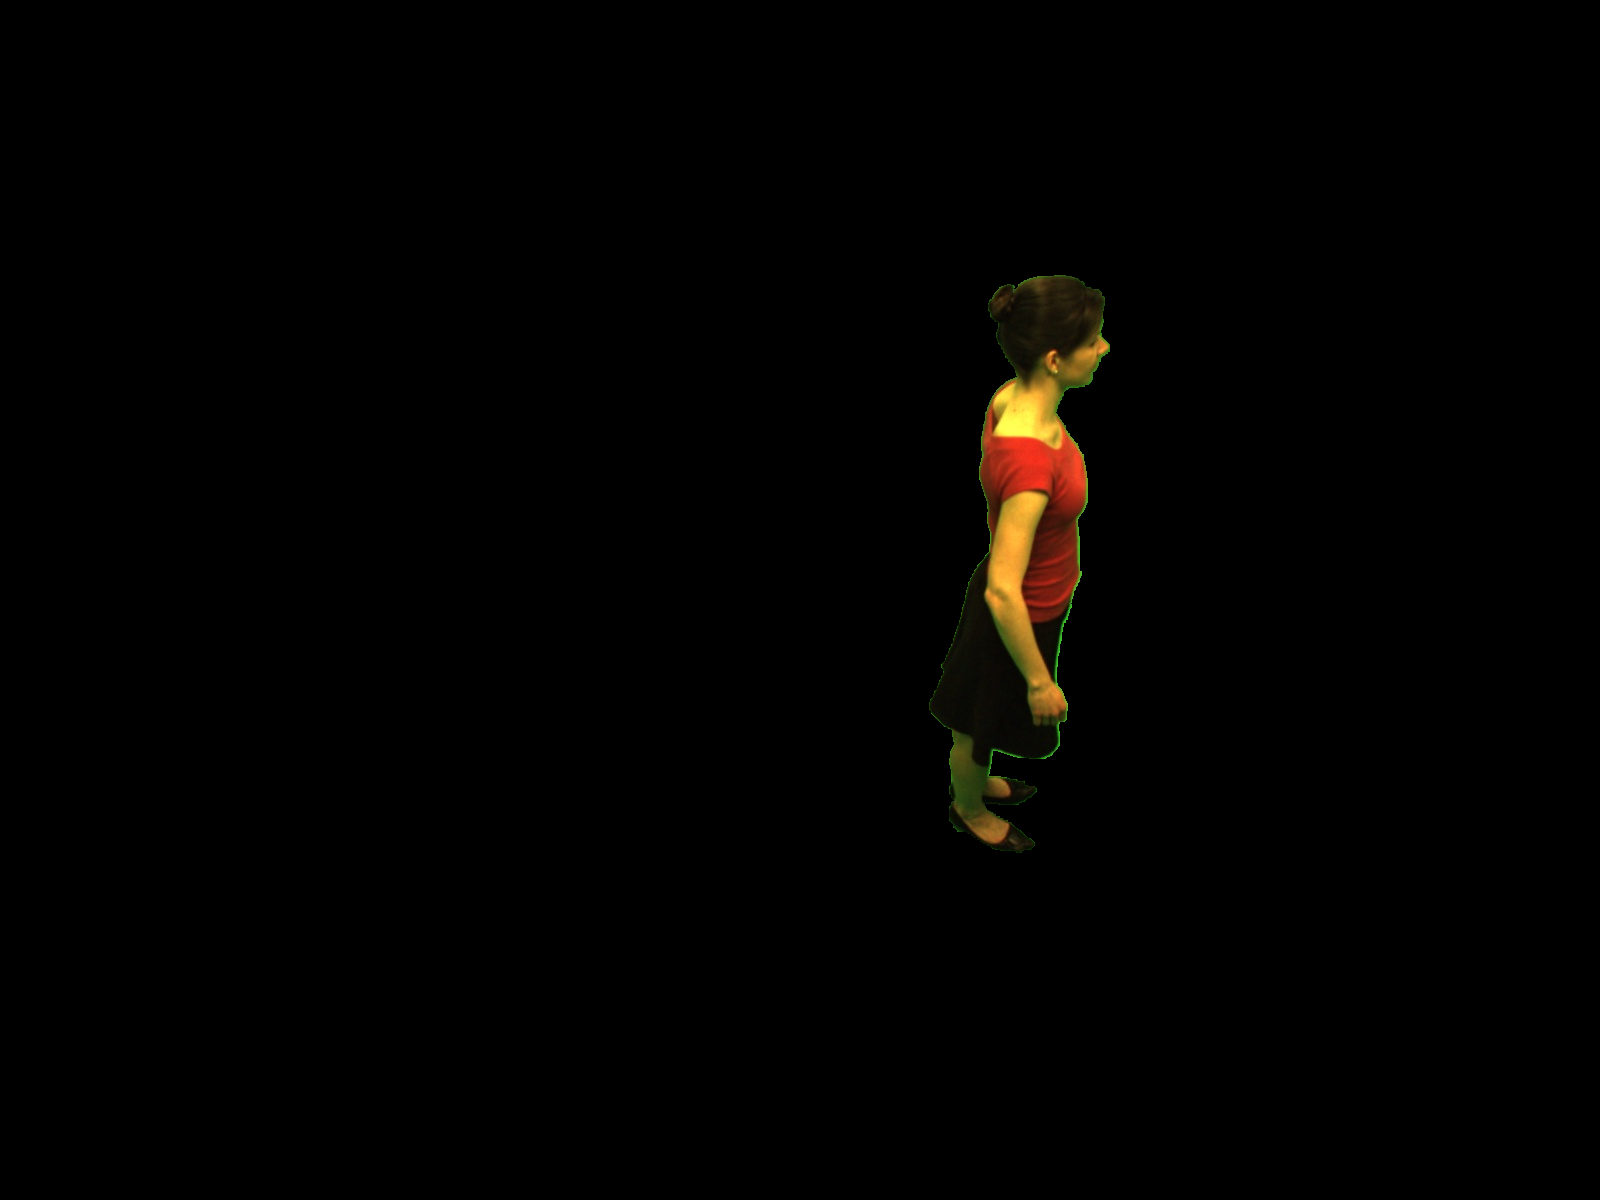

In [11]:
# @title Example frame.
# @markdown Make sure that the video was processed correctly.
# @markdown If this gives an exception, try running the preceding cell one more time--sometimes uploading to Google Drive can fail.

from pathlib import Path
import imageio
from PIL import Image

image_paths = list((rgb_dir / '1x').iterdir())
Image.open(image_paths[0])

In [13]:
import json
# without colmap
cam_json_tmp = {
  # A 3x3 world-to-camera rotation matrix representing the camera orientation.
  "orientation": [
    [1., 0., 0.],
    [0., 1., 0.],
    [0., 0., 1.]
  ],
  # The 3D position of the camera in world-space.
  "position": [0, 0, -3.],
  # The focal length of the camera.
  "focal_length": 1024,
  # The principle point [u_0, v_0] of the camera.
  "principal_point": [256, 256],
  # The skew of the camera.
  "skew": 0.0,
  # The aspect ratio for the camera pixels.
  "pixel_aspect_ratio": 1.0,
  # Parameters for the radial distortion of the camera.
  "radial_distortion": [0., 0., 0.],
  # Parameters for the tangential distortion of the camera.
  "tangential_distortion": [0., 0.],
  # The image width and height in pixels.
  "image_size": [512, 512]
}

dataset_json = {
  #// The total number of images in the dataset.
  "count": len(glob.glob('%s/*'%str(rgb_raw_dir))),
  #// The total number of training images (exemplars) in the dataset.
  "num_exemplars": len(glob.glob('%s/*'%str(rgb_raw_dir))),
  #// A list containins all item IDs in the dataset.
  "ids": [i.split('/')[-1][:-4] for i in glob.glob('%s/*'%str(rgb_raw_dir))],
  #// A list containing all training item IDs in the dataset.
  "train_ids": [i.split('/')[-1][:-4] for i in glob.glob('%s/*'%str(rgb_raw_dir))],
  #// A list containing all validation item IDs in the dataset.
  #// This should be mutually exclusive with `train_ids`.
  "val_ids": [i.split('/')[-1][:-4] for i in glob.glob('%s/*'%str(rgb_raw_dir))],
}

#scale=0.2
scale=0.05
scene_json = {
  #// The scale factor we will apply to the pointcloud and cameras. This is
  #// important since it controls what scale is used when computing the positional
  #// encoding.
  "scale": scale,
  #// Defines the origin of the scene. The scene will be translated such that
  #// this point becomes the origin. Defined in unscaled coordinates.
  "center": [
    0.,
    0.,
    0.
  ],
  #// The distance of the near plane from the camera center in scaled coordinates.
  #"near": 1.5 * scale,
  "near": 1*scale,  
  #// The distance of the far plane from the camera center in scaled coordinates.
  #"far": 4.5 * scale
  "far":  20*scale
}

metadata_json = {}
for i in  glob.glob('%s/*'%str(rgb_raw_dir)):
    key = i.split('/')[-1][:-4]
    idx=int(key)
    metadata_json[key] = {
        #// The embedding ID used to fetch the deformation latent code
        #// passed to the deformation field.
        "warp_id": idx,
        #// The embedding ID used to fetch the appearance latent code
        #// which is passed to the second branch of the template NeRF.
        "appearance_id": idx,
        #// For validation rig datasets, we use the camera ID instead
        #// of the appearance ID. For example, this would be '0' for the
        #// left camera and '1' for the right camera. This can potentially
        #// also be used for multi-view setups as well.
        "camera_id": 0
        }

In [14]:
# # for real dataset
# ks = [2121.068882327623, 2121.068882327623, 1104.4833984375, 604.4934692382812]
# for i in glob.glob('%s/*'%str(rgb_raw_dir)):
#     idx=int(i.split('/')[-1][:-4])
#     cammat = np.loadtxt('/private/home/gengshany/code/vid2shape/logdir/sfm-mcats10-lbs-rkopt-16b-100ep/init-cam/cat_905-%05d.txt'%(idx))
#     cam_json = cam_json_tmp.copy()

#     # predicted camera
#     Rmat=cammat[:3,:3]
#     Tmat=cammat[:3,3:]
    
# #     # identity matrix
# #     Rmat = np.eye(3)
# #     Tmat = np.asarray([0,0,3])[:,None]

#     Tmat=-Rmat.T.dot(Tmat)
#     Tmat = Tmat[:,0]
        
#     cam_json['focal_length'] = ks[0]
#     cam_json['principal_point'][0] = ks[2]
#     cam_json['principal_point'][1] = ks[3]
#     cam_json['image_size'] = list(img.shape[:2][::-1])
#     cam_json['orientation'] = Rmat.tolist()
#     cam_json['position'] = Tmat.tolist()

#     with open('%s/%s.json'%(str(camera_dir), i.split('/')[-1][:-4]), 'w') as outfile:
#         json.dump(cam_json, outfile, indent=4)
        
# with open('%s/dataset.json'%str(root_dir),'w') as outfile:
#         json.dump(dataset_json, outfile, indent=4)
        
# with open('%s/scene.json'%str(root_dir),'w') as outfile:
#         json.dump(scene_json, outfile, indent=4)
        
# with open('%s/metadata.json'%str(root_dir),'w') as outfile:
#         json.dump(metadata_json, outfile, indent=4)

In [15]:
# for ama 3D dataset
gt_pmat = '/private/home/gengshany/data/AMA/T_samba/calibration/Camera1.Pmat.cal'
pmat = np.loadtxt(gt_pmat)
K,R,T,_,_,_,_=cv2.decomposeProjectionMatrix(pmat)
Rmat_gt = R
Tmat_gt = T[:3,0]/T[-1,0]
Tmat_gt = Rmat_gt.dot(-Tmat_gt[...,None])[...,0]
K = K/K[-1,-1]


for i in glob.glob('%s/*'%str(rgb_raw_dir)):
    idx=int(i.split('/')[-1][:-4])
    if isinstance(seqname, str):
        cammat = np.loadtxt('/private/home/gengshany/code/vid2shape/logdir/ama-female1-lbs-rkopt-b16-2ff-ft3/init-cam/T_samba-%05d.txt'%(idx))
    else:
        campath = sorted(glob.glob('/private/home/gengshany/code/vid2shape/logdir/ama-female-lbs-rkopt-300-b16-init/init-cam/T_samba*.txt'))[idx]
        cammat = np.loadtxt(campath)
    cam_json = cam_json_tmp.copy()
    
#     # calibrated camera
#     Rmat=Rmat_gt[:3,:3]
#     Tmat=Tmat_gt[:,None]

    # predicted camera
    Rmat=cammat[:3,:3]
    Tmat=cammat[:3,3:]

    Tmat=-Rmat.T.dot(Tmat)
    Tmat = Tmat[:,0]
    
    
    cam_json['focal_length'] = K[0,0]
    cam_json['principal_point'][0] = K[0,2]
    cam_json['principal_point'][1] = K[1,2]
    cam_json['image_size'] = list(img.shape[:2][::-1])
    cam_json['orientation'] = Rmat.tolist()
    cam_json['position'] = Tmat.tolist()

    with open('%s/%s.json'%(str(camera_dir), i.split('/')[-1][:-4]), 'w') as outfile:
        json.dump(cam_json, outfile, indent=4)
        
with open('%s/dataset.json'%str(root_dir),'w') as outfile:
        json.dump(dataset_json, outfile, indent=4)
        
with open('%s/scene.json'%str(root_dir),'w') as outfile:
        json.dump(scene_json, outfile, indent=4)
        
with open('%s/metadata.json'%str(root_dir),'w') as outfile:
        json.dump(metadata_json, outfile, indent=4)

In [13]:
# # for animated 3D dataset
# for i in glob.glob('%s/*'%str(rgb_raw_dir)):
#     idx=int(i.split('/')[-1][:-4])
#     cammat = np.loadtxt('/private/home/gengshany/code/vid2shape/database/DAVIS/Cameras/Full-Resolution/%s/%05d.txt'%(seqname,idx))
#     cam_json = cam_json_tmp.copy()
    
#     Rmat=cammat[:3,:3]
#     Tmat=cammat[:3,3:]
#     Tmat=-Rmat.T.dot(Tmat)
#     Tmat = Tmat[:,0]
    
    
    
#     cam_json['focal_length'] = cammat[3,0]
#     cam_json['orientation'] = Rmat.tolist()
#     cam_json['position'] = Tmat.tolist()

#     with open('%s/%s.json'%(str(camera_dir), i.split('/')[-1][:-4]), 'w') as outfile:
#         json.dump(cam_json, outfile, indent=4)
        
# with open('%s/dataset.json'%str(root_dir),'w') as outfile:
#         json.dump(dataset_json, outfile, indent=4)
        
# with open('%s/scene.json'%str(root_dir),'w') as outfile:
#         json.dump(scene_json, outfile, indent=4)
        
# with open('%s/metadata.json'%str(root_dir),'w') as outfile:
#         json.dump(metadata_json, outfile, indent=4)